# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

**Технологический процесс**

Как золото получают из руды? Изучите внимательно стадии процесса.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

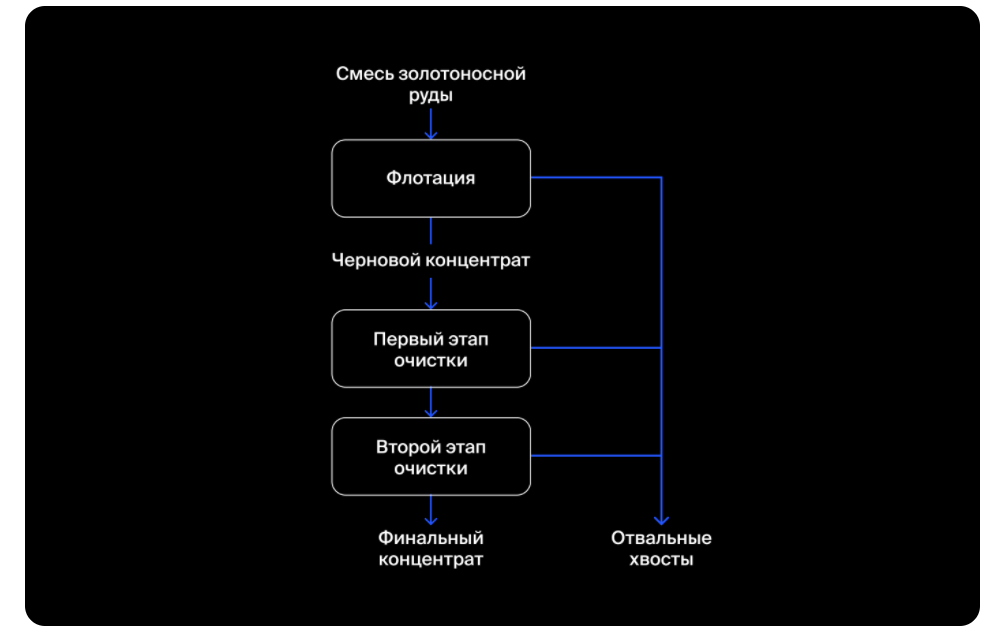

Опишем каждую стадию:

1. Флотация

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.

На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

Описание данных

Технологический процесс

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate **— ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

Параметры этапов

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики

Возможные значения для блока [тип_параметра]:

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

Расчёт эффективности

Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.
Эффективность обогащения рассчитывается по формуле

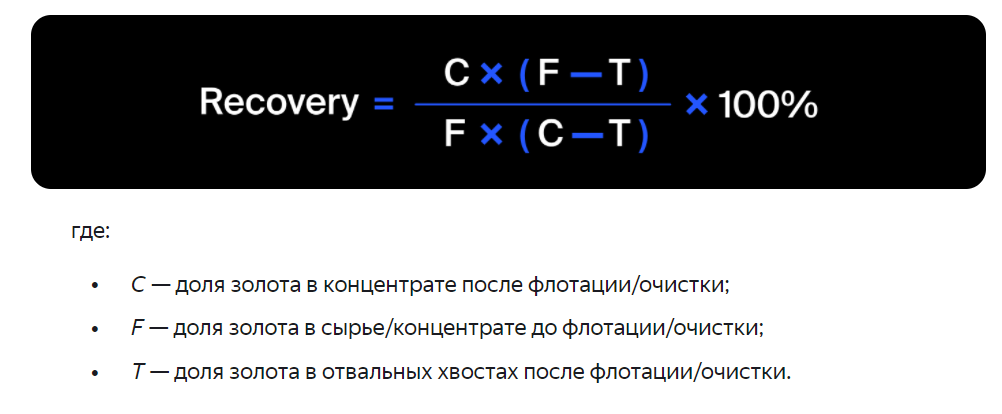

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Метрика качества

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:

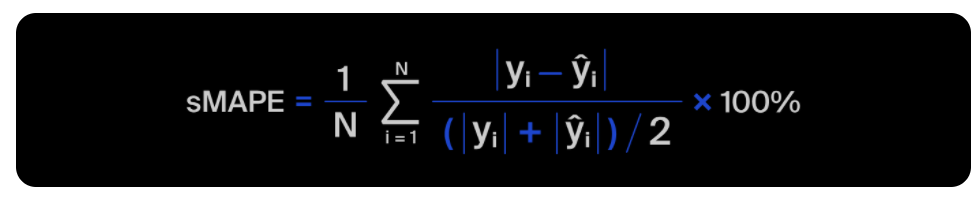

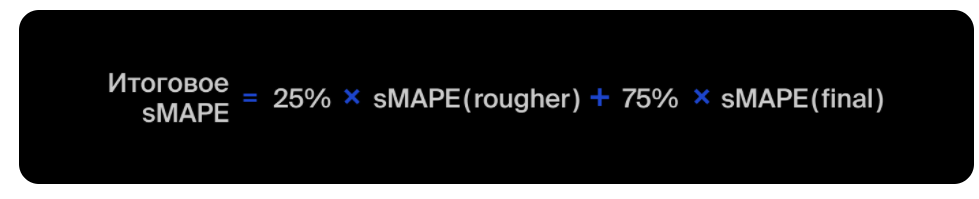

## Подготовка данных

### Откроем файлы и изучим их

Импортируем те библиотеки, которые понадобятся в исследовании:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Посмотрим для начала те данные, которые нам предоставлены:

**gold_recovery_train_new.csv** — обучающая выборка

**gold_recovery_test_new.csv** — тестовая выборка

**gold_recovery_full_new.csv** — исходные данные

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Выведем данные из этих датафреймов

In [3]:
display(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
display(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [5]:
display(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Проверим данные на наличие пропусков и дубликатов

In [6]:
pd.options.display.max_rows = 100
data_full.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

In [7]:
data_full.duplicated().sum()

0

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Каким-либо образом оценить почему пропущены те или иные данные весьма сложно - посмотрим насколько много таких пропущенных значений - если их несильно много, и это 1-2 строки для большинства признаков, то возможно самый простой способ - это просто пока заполнить эти данные средними значениями

### Выполним предобработку данных

In [9]:
data_full.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol                     1748
rougher.input.floatbank11_xanthate                     453
rougher.state.floatbank10_e_air                        436
primary_cleaner.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air               220
final.output.concentrate_sol                           211
rougher.input.feed_size                                145
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.input.xanthate                         104
final.output.tail_pb                                   101
rougher.input.feed_pb                                  100
rougher.input.feed_sol                                  99
primary_cleaner.output.tail_sol                         62
rougher.input.floatbank11_sulfate                       44
primary_cleaner.input.depressant                        37
rougher.input.floatbank10_sulfate                       34
primary_cleaner.input.sulfate                           

Как видно, пропусков всё же довольно много - просто удалить их это большая потеря для общего объёма данных. Можно было бы заполнить все пропущенные значения просто средними, но у нас есть информация, что соседние значения, полученные примерно в одно и то же время - часто похожи. Соответственно, можно было бы применить следующую лоигку: если значение пропущено, то заполнить его значением из соседней даты, а не просто средним. Напишем ниже функцию для подобного заполнения и потом прогоним через неё все столбцы.

Если мы будем заполнять пропущенные значения предыдущим значением по дате, то нужно чтобы хотя бы в первой строчке датафрейма все значения были заполнены. Проверим чтобы в них не было пропусков:

Перед обработкой пропущенных значений переведём столбец даты в нужный формат:

In [10]:
def date_format(column):
    return pd.to_datetime(column, format='%Y-%m-%d %H:%M:%S')

In [11]:
data_full['date'] = data_full['date'].apply(date_format)

In [12]:
# убедимся, чтобы даты шли по возрастанию в датафрейме:
data_full = data_full.sort_values(by='date').reset_index(drop=True)

In [13]:
data_full.head(1).isna().sum()

date                                                  0
final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Как видно, первая строка полностью заполнена - следовательно предложенный алгоритм по заполнению пропущенных значений просто предыдущим значением по дате - работоспособен.

In [14]:
columns_full = data_full.columns
indexes_full = data_full.index

In [15]:
data_full = data_full.fillna('значение для заполнения')

In [16]:
for column in columns_full:
    for index in indexes_full:
        if data_full.loc[index, column] == 'значение для заполнения':
            data_full.loc[index, column] = data_full.loc[index-1, column]

In [17]:
data_full.isna().sum().sort_values(ascending=False)

date                                                  0
rougher.state.floatbank10_b_air                       0
rougher.state.floatbank10_f_air                       0
rougher.state.floatbank10_e_level                     0
rougher.state.floatbank10_e_air                       0
rougher.state.floatbank10_d_level                     0
rougher.state.floatbank10_d_air                       0
rougher.state.floatbank10_c_level                     0
rougher.state.floatbank10_c_air                       0
rougher.state.floatbank10_b_level                     0
rougher.state.floatbank10_a_level                     0
secondary_cleaner.output.tail_ag                      0
rougher.state.floatbank10_a_air                       0
rougher.output.tail_au                                0
rougher.output.tail_sol                               0
rougher.output.tail_pb                                0
rougher.output.tail_ag                                0
rougher.output.recovery                         

Как видно - предложенный метод сработал: если значение в ячейке отсутствовало, то оно заполнялось значением ячейки той же колонки, но предшествующей даты (предыдущего индекса), так как по условию проведенные примерно в одно и то же время замеры являются близкими по значению (это так же видно на срезах даннных)

Теперь нужно придать соответствующий вид датафреймам data_train и data_test. Так как они все по сути являются срезами данных из предобработанного data_full, то можно не заниматься их предобработкой, а просто заполнить пропущенные значения в этих датафреймах из ранее заполненного data_full

In [18]:
# убедимся, что все значения дат действительно уникальные
print(len(data_full['date'].unique()))
print(data_full.shape[0])

19439
19439


In [19]:
# преобразуем значения дат в других датафреймах к нужному формату
data_test['date'] = data_test['date'].apply(date_format)
data_train['date'] = data_train['date'].apply(date_format)

In [20]:
# именно дата обеспечивает связь между датафреймами data_test, data_train и data_full - сделаем её новым индексом
data_full = data_full.set_index('date')
data_test = data_test.set_index('date')
data_train = data_train.set_index('date')

Заполним недостающие данные теми, что мы получили в полностью обработанной таблице data_full

In [21]:
columns_test = data_test.columns
indexes_test = data_test.index
data_test = data_test.fillna('значения для заполнения')
for column in columns_test:
    for index in indexes_test:
        if data_test.loc[index, column] == 'значения для заполнения':
            data_test.loc[index, column] = data_full.loc[index, column]

In [22]:
columns_train = data_train.columns
indexes_train = data_train.index
data_train = data_train.fillna('значения для заполнения')
for column in columns_train:
    for index in indexes_train:
        if data_train.loc[index, column] == 'значения для заполнения':
            data_train.loc[index, column] = data_full.loc[index, column]

In [23]:
data_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [24]:
data_train.isna().sum()

final.output.concentrate_ag                           0
final.output.concentrate_pb                           0
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au                 0
primary_cleaner.output.tail_ag                  

Как видно, теперь все пропуски заполнены как в датафрейме data_full, так и в тестовой и тренировочной выборках.

### Проверим правильность рассчитанной эффективности обогащения

По заданию нужно сначала убедиться, что эффективность обогащения чернового концентрата **rougher.output.recovery** рассчитана верно в обучающей выборке. В качестве проверки нужно найти MAE между уже записанным столбцом данных значений и вычисленным самостоятельно по параметрам из формулы

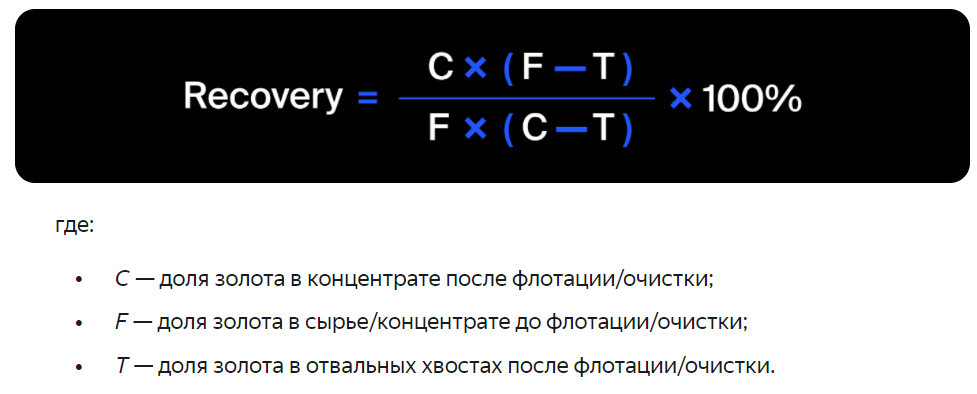

In [25]:
data_train['rougher.output.recovery']

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

In [26]:
data_train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

<AxesSubplot:>

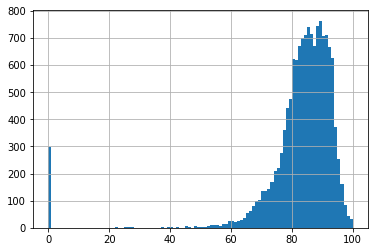

In [27]:
data_train['rougher.output.recovery'].hist(bins=100)

Как видно - значения вполне правдоподобны - от 0 до 100 процентов эффективности. Можем заметить что довольно много значений имеет эффективность 0 : судя по формуле это означает что вся концентрация золота в сырье в итоге попала в отвальный хвост, а не пошла в черновой концентрат

Найдём теперь в датафрейме составляющие формулы для вычисления данного параметра самостоятельно:

In [28]:
# C - доля золота в концентрате после флотации
c = data_train['rougher.output.concentrate_au']
# F - доля золота в сырье
f = data_train['rougher.input.feed_au']
# T - доля золота в отвальных хвостах после флотации
t = data_train['rougher.output.tail_au']

In [29]:
data_train['rougher.output.recovery_calculated'] = (c*(f-t))/(f*(c-t))*100

<AxesSubplot:>

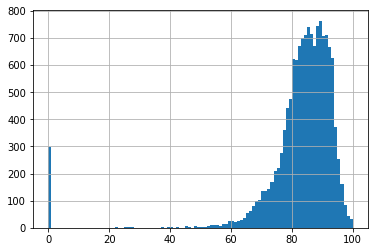

In [30]:
data_train['rougher.output.recovery_calculated'].hist(bins=100)

Можем сказать уже по гистограмме, что вычисления выглядят весьма правдоподобно - фактически 1 в 1 с гистограммой столбца эффективности флотации, который был задан изначально. Найдём MAE между данными столбцами, который требуется по условию:

In [31]:
error = mean_absolute_error(data_train['rougher.output.recovery_calculated'], data_train['rougher.output.recovery'])

In [32]:
print(f'Средняя абсолютная ошибка равна {error:.15f}')

Средняя абсолютная ошибка равна 0.000000000000010


Ошибка стремится к 0 - очевидно данным можно верить. Удалим вычисленный столбец, чтобы он не занимал память

In [33]:
del data_train['rougher.output.recovery_calculated']

### Проанализируем признаки, которые недоступны в тестовой выборке

In [34]:
# запишем названия столбцов, которые есть в data_full, но нет в data_test в отдельный список для его изучения
bonus_columns = []
for column in data_full.columns:
    if column not in data_test.columns:
        bonus_columns.append(column)

In [35]:
# проверим, что все столбцы data_full точно присутствуют в data_test
print(len(bonus_columns))
print(data_full.shape[1] - data_test.shape[1])

34
34


In [36]:
bonus_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [37]:
data_test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Как видно, в тестовой выборке содержаться фактически только данные о сырье, которое будет подаваться на флотацию или первый этап очистки, а так же характеристики установок, на которых данные процессы будут проводиться:

**rougher.input.feed** - характеристика подаваемой дроблёной смеси на флотацию

**rougher.input/state.floatbank** - судя по всему характеристики флотационной установки

**primary_cleaner.input** - характеристика подаваемого сырья на первую очистку после флотации

**primary_cleaner.state.floatbank** - характеристика установки первичной очистики

**secondary_cleaner.state.floatbank** - вероятно так же характеристики установки вторичной очистки


Столбцы же, которых не хватает в тестовой выборке - это параметры продукта, выходящего на различных этапах:

**rougher.output** - например параметры продукта после флотации

Либо же отсутствуют различные расчётные характеристки по типу **rougher.calculation** или же искомые значения эффективности процессов получения чернового **rougher.output.recovery** и **final.output.recovery** финального концентратов

В общем можно сказать, что в тестовой выборке нам пытаются дать то, что предположительно можно знать ещё до запуска установки: параметры исходного сырья,а так же параметры установок очистки и флотации (исключение пожалуй составляют признаки по типу **primary_cleaner.input.sulfate** - параметры сырья, которое попадает в первый этап очистки, вероятнее всего знать мы не должны ещё перед запуском, но возможно по каким-то расчётным формулам предполагается, что их всё же можно получить заранее.

В полном наборе данных data_full мы уже фактически "запускаем" установку и нам открываются признаки с данными о продуктах (черновой и финальный концентрат, отвальные хвосты) , а так же целевые признаки с эффективностью получения целевого и финального концентратов.

## Анализ данных

### Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Выведем названия всех столбцов data_full, чтобы найти требуемые признаки для данного исследования:

In [38]:
data_full.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

In [39]:
# выделим потенциально нужные признаки
concentrations_list = []
for column in data_full.columns:
    if 'concentrate' in column or 'rougher.input.feed' in column:
        concentrations_list.append(column)

In [40]:
concentrations_list

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [41]:
# ещё немного отфильтруем лишнего
concentrations_metals = []
wrong_words = ['calculation', 'feed_size', 'feed_rate']
for column in concentrations_list:
    good_word = True
    for word in wrong_words:
        if word in column:
            good_word = False
    if good_word:
        concentrations_metals.append(column)

In [42]:
concentrations_metals

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

Именно на этом моменте оптимальнее всего удалить строки с 0 в значении концентраций - такие показатели по сут являются выбросами

In [43]:
old_size = data_full.shape[0]

for metal_concentration in concentrations_metals:
    data_full = data_full[data_full[metal_concentration] > 0]
    data_train = data_train[data_train[metal_concentration] > 0]
    if metal_concentration in data_test.columns:                        # в data_test есть не все колонки data_full
        data_test = data_test[data_test[metal_concentration] > 0]        
new_size = data_full.shape[0]
saved_data = (new_size/old_size)*100
print(f'Осталось данных от изначального объёма после фильтрации:{saved_data} %')

Осталось данных от изначального объёма после фильтрации:96.90827717475179 %


In [44]:
# на данном этапе нам не нужны концентрации элемента sol - только au, ag, pb
concentrations_au_ag_pb = []
for metal_concentration in concentrations_metals:
    if 'sol' not in metal_concentration:
        concentrations_au_ag_pb.append(metal_concentration)

In [45]:
concentrations_au_ag_pb

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_au']

In [46]:
# для удобства построения гистограмм заведём отдельные списки для каждого из компонентов:
ag_list = []
pb_list = []
au_list = []

In [47]:
for column in concentrations_list:
    if column[-2:] == 'ag':
        ag_list.append(column)
    elif column[-2:] == 'pb':
        pb_list.append(column)
    elif column[-2:] == 'au':
        au_list.append(column)

In [48]:
ag_list

['final.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'rougher.input.feed_ag',
 'rougher.output.concentrate_ag']

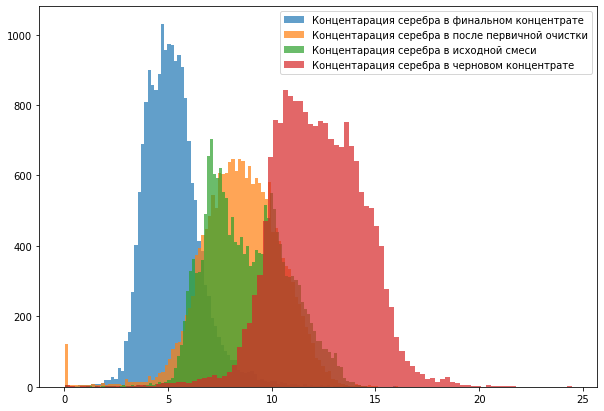

In [49]:
plt.figure(figsize=(10,7))
plt.hist(data_full[ag_list[0]], bins=100, label='Концентарация серебра в финальном концентрате', alpha=0.7)
plt.hist(data_full[ag_list[1]], bins=100, label='Концентарация серебра в после первичной очистки', alpha=0.7)
plt.hist(data_full[ag_list[2]], bins=100, label='Концентарация серебра в исходной смеси', alpha=0.7)
plt.hist(data_full[ag_list[3]], bins=100, label='Концентарация серебра в черновом концентрате', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

Можем сказать, что концентрация серебра чаще всего максимальна в черновом концентрате, а затем уменьшается после первичной и вторичной очистки. Но при этом - в исходой смеси среднее содержание серебра где-то между финальным концентратом и первичной чисткой. Так что глобально для серебра можно сделать следующий вывод: изначально его весьма мало в исходной смеси, затем после флотации за счёт отвода отвальных хвостов концентрация серебра повышается, но далее после первичной и вторичной очистки вновь падает, вероятно, уступая место золоту, которое и хотят в итоге получить.

In [50]:
pb_list

['final.output.concentrate_pb',
 'primary_cleaner.output.concentrate_pb',
 'rougher.input.feed_pb',
 'rougher.output.concentrate_pb']

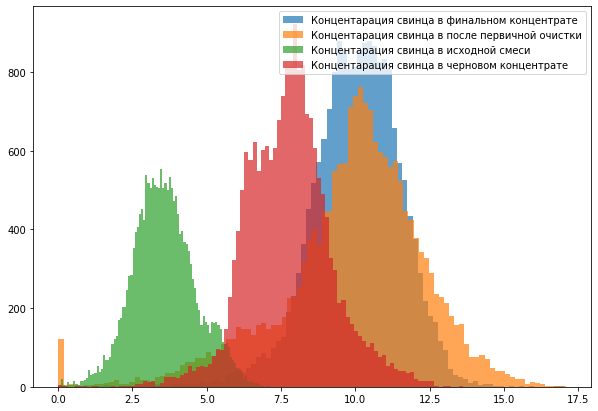

In [51]:
plt.figure(figsize=(10,7))
plt.hist(data_full[pb_list[0]], bins=100, label='Концентарация свинца в финальном концентрате', alpha=0.7)
plt.hist(data_full[pb_list[1]], bins=100, label='Концентарация свинца в после первичной очистки', alpha=0.7)
plt.hist(data_full[pb_list[2]], bins=100, label='Концентарация свинца в исходной смеси', alpha=0.7)
plt.hist(data_full[pb_list[3]], bins=100, label='Концентарация свинца в черновом концентрате', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [52]:
data_full['final.output.concentrate_pb'].mean()

10.030999435880473

In [53]:
data_full['primary_cleaner.output.concentrate_pb'].mean()

9.861865255079532

In [54]:
data_full['rougher.output.concentrate_pb'].mean()

7.757999263747721

Что касается свинца - его концентрация заметно растёт после флотации и первичной очистки, но при этом на него довольно слабо влияет вторичная очистка - в финальном концентрате средняя концентрация свинца примерно равна средней концентрации свинца после первичной очистки

In [55]:
au_list

['final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_au',
 'rougher.output.concentrate_au']

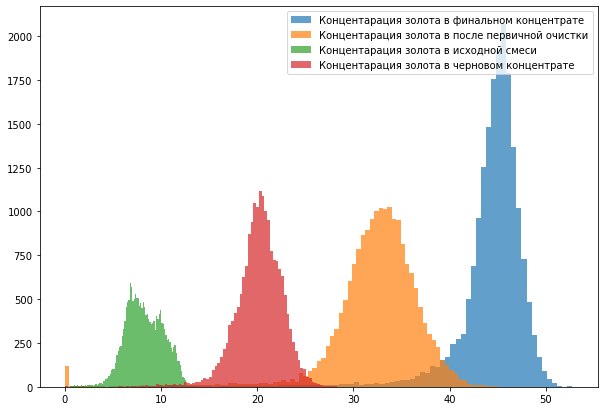

In [56]:
plt.figure(figsize=(10,7))
plt.hist(data_full[au_list[0]], bins=100, label='Концентарация золота в финальном концентрате', alpha=0.7)
plt.hist(data_full[au_list[1]], bins=100, label='Концентарация золота в после первичной очистки', alpha=0.7)
plt.hist(data_full[au_list[2]], bins=100, label='Концентарация золота в исходной смеси', alpha=0.7)
plt.hist(data_full[au_list[3]], bins=100, label='Концентарация золота в черновом концентрате', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

По полученной гистограмме можно сказать, что исследование выглядит вполне адекватно и похожим на правду - по мере прохождения этапов очистки концентрация золота растёт - от ~ 8 % в исходной смеси до ~ 45 % в финальном концентрате

### Исследуем суммарную концентрацию всех веществ на разных стадиях очистки

На данном этапе мы уже будем работать так же с элементом **sol** - для проверки снова выведем тот список, с которым собираемся работать

In [57]:
concentrations_metals

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [58]:
# заведем списки, чтобы разделить столбцы данных о концентрациях каждый к своему этапу:
final_concentrations = []
primary_cleaner_concentrations = []
rougher_input_concentrations = []
rougher_output_concentrations = []

In [59]:
for column in concentrations_metals:
    if 'final.output' in column:
        final_concentrations.append(column)
    elif 'primary_cleaner' in column:
        primary_cleaner_concentrations.append(column)   
    elif 'rougher.input' in column:
        rougher_input_concentrations.append(column)
    elif 'rougher.output' in column:
        rougher_output_concentrations.append(column)

Создадим в датафрейме data_full столбцы с соответствующими суммами концентраций для их дальнейшего анализа:

In [60]:
data_full['final_concentrations_sum'] = data_full[[final_concentrations[0], final_concentrations[1], 
                                                   final_concentrations[2], final_concentrations[3],]].sum(axis=1)

In [61]:
data_full['primary_cleaner_concentrations_sum'] = data_full[[primary_cleaner_concentrations[0],
                                                             primary_cleaner_concentrations[1],
                                                             primary_cleaner_concentrations[2], 
                                                             primary_cleaner_concentrations[3],]].sum(axis=1)

In [62]:
data_full['rougher_input_concentrations_sum'] = data_full[[rougher_input_concentrations[0],
                                                             rougher_input_concentrations[1],
                                                             rougher_input_concentrations[2], 
                                                             rougher_input_concentrations[3],]].sum(axis=1)

In [63]:
data_full['rougher_output_concentrations_sum'] = data_full[[rougher_output_concentrations[0],
                                                             rougher_output_concentrations[1],
                                                             rougher_output_concentrations[2], 
                                                             rougher_output_concentrations[3],]].sum(axis=1)

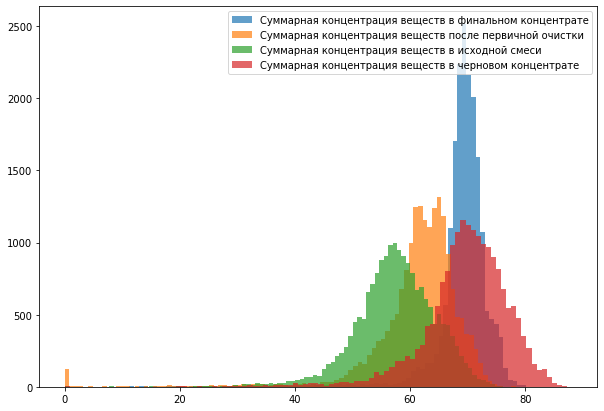

In [64]:
plt.figure(figsize=(10,7))
plt.hist(data_full['final_concentrations_sum'], bins=100, label='Суммарная концентрация веществ в финальном концентрате', alpha=0.7)
plt.hist(data_full['primary_cleaner_concentrations_sum'], bins=100, label='Суммарная концентрация веществ после первичной очистки', alpha=0.7)
plt.hist(data_full['rougher_input_concentrations_sum'], bins=100, label='Суммарная концентрация веществ в исходной смеси', alpha=0.7)
plt.hist(data_full['rougher_output_concentrations_sum'], bins=100, label='Суммарная концентрация веществ в черновом концентрате', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

Можем сказать, что суммарная концентрация рассматриваемых в датафрейме веществ **au** , **sol**, **ag**, **pb** достигает в финальной смеси с очень большой вероятностью примерно 70-75 % (как было вычислено ранее - большая часть из этих процентов - золото). До попадания в стадию финального концентрата суммарная концентрация данных веществ имеет гораздо более широкий разброс значений (видимо существенную часть составляют различные флотационные реагенты и прочие добавки, которые удаляются с отвальными хвостами).

In [65]:
data_full['primary_cleaner.output.concentrate_au'].describe()

count    18838.000000
mean        32.273423
std          5.071557
min          0.010000
25%         30.493856
50%         32.822451
75%         35.020866
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64

### Сравним распределение размеров гранул сырья на обучающей и тестовой выборках

Гранулы сырья содержатся в столбце **rougher.input.feed_size** 

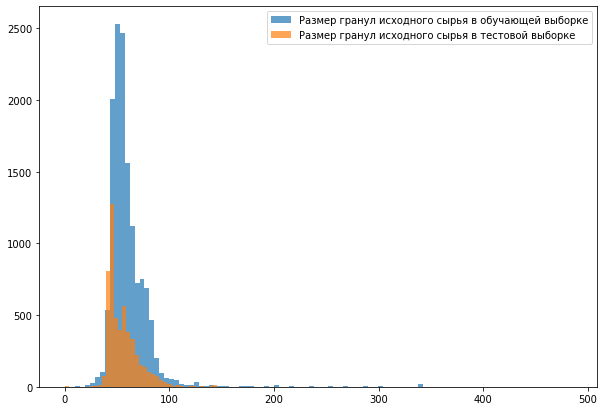

In [66]:
plt.figure(figsize=(10,7))
plt.hist(data_train['rougher.input.feed_size'], bins=100, label='Размер гранул исходного сырья в обучающей выборке', alpha=0.7)
plt.hist(data_test['rougher.input.feed_size'], bins=100, label='Размер гранул исходного сырья в тестовой выборке', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

Распределение примерно одинаковое - можем оставить выборки такими, какие есть

## Модель

Обучим модель для предсказания эффективности обогащения чернового и финального концентрата. В качестве метрики качества, как я понял, нужно использовать sMAPE (симметричная средняя абсолютная процентная ошибка). Так же проверить насколько хорошо обучена модель требуется при помощи оценки кросс-валидацией

### Получение признаков и целевого признака для обучения моделей чернового и финального концентратов

Те признаки, на которых можно учить модель по данным тренировочной выборки, логично должны присутствовать в тестовой выборке. Посмотрим снова какие колонки есть в data_test и решим какие из них мы можем использовать для определения эффективности получения чернового и финального концентратов

In [67]:
data_test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Думаю верным будет сказать, что для определения эффективности получения чернового концентрата мы можем использовать только признаки **rougher** - характеристики подаваемой смеси и параметры флотационной установки; параметры установок первичной и вторичной очистки мы будем знать только перед получением финального концентрата и их использование для чернового концентрата будет ошибочным "загляыдыванием в будущее" при обучении модели, а уже как раз для модели определения эффективности финального концентрата можно было бы использовать все столбцы датафрейма, как признаки для обучения модели

In [68]:
# запишем доступные признаки для обучения модели предсказания эффективности добычи чернового концентрата
rougher_recovery_inf = []
for column in data_test.columns:
    if 'rougher' in column:
        rougher_recovery_inf.append(column)
print(rougher_recovery_inf)

['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']


Для будущей кросс-валидации понадобится вновь индексирование по номеру строки, а не дате, поэтому сразу предусмотрим этот момент:

In [69]:
data_train_indexed = data_train.copy(deep=True)
data_train_indexed['index'] = range(len(data_train))
data_train_indexed = data_train_indexed.set_index('index')

In [70]:
# выделенные только что столбцы - доступные признаки для обучения на тренировочной выборке модели для чернового концентрата
features_rougher = data_train_indexed[rougher_recovery_inf]
# целевой признак - эффективность обогащения чернового концентрата
target_rougher = data_train_indexed['rougher.output.recovery']
# модель для работы с эффективностью получения финального концентрата может учиться на всех признаках тестовой выборки
features_final = data_train_indexed[data_test.columns]
# целевой признак - тоже эффективность обогащения, но уже финального концентрата
target_final = data_train_indexed['final.output.recovery']

Выведем на экран получившиеся датафреймы для проверки:

In [71]:
display(features_rougher)

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
index,,,,,,,,,,,,,,,,,,,,,
0,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.00799,11.836743,6.005818,...,1603.011353,-434.715027,1602.375,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636
1,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,...,1600.754587,-449.953435,1600.47958,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001
2,6.116455,2.159622,530.02661,57.510649,35.97163,6.362222,11.920603,6.197377,11.920305,6.204633,...,1599.33733,-450.00853,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147
3,6.043309,2.037807,542.59039,57.792734,36.862241,6.118189,11.630094,6.203177,11.69245,6.196578,...,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835
4,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,...,1600.208824,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,7.76277,9.158609,7.766744,9.156069,...,1149.80789,-498.789721,1047.963596,-498.413079,946.640977,-499.152477,849.664935,-499.214461,849.758091,-497.448664
13712,6.121323,4.144989,559.031805,119.499241,38.591551,4.838619,7.356687,9.304952,7.095508,9.297924,...,1147.675196,-500.608341,1048.565741,-500.93281,949.773589,-500.023144,848.515225,-500.289405,850.013123,-496.822119
13713,5.970515,4.020002,555.682872,122.26269,40.074026,4.525061,6.58602,9.299606,6.58413,9.300133,...,1149.942902,-501.717903,1049.60439,-500.549053,952.702732,-502.352296,849.016017,-500.505677,850.455635,-506.897968


In [72]:
display(target_rougher)

index
0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
13711    89.574376
13712    87.724007
13713    88.890579
13714    89.858126
13715    89.514960
Name: rougher.output.recovery, Length: 13716, dtype: float64

In [73]:
display(features_final)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
index,,,,,,,,,,,,,,,,,,,,,
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.91214,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.31628,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.32214,7.25,0.996739,1599.96872,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.03651,-500.857308,11.99955,-501.193686,9.970366,-499.20164,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.95307,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13711,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.57823,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.00784,-501.296428
13712,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.03566,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
13713,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [74]:
display(target_final)

index
0        70.541216
1        69.266198
2        68.116445
3        68.347543
4        66.927016
           ...    
13711    73.755150
13712    69.049291
13713    67.002189
13714    65.523246
13715    70.281454
Name: final.output.recovery, Length: 13716, dtype: float64

### Запись функций для sMAPE моделей и вычисления итогового sMAPE

Используя данные из условия запишем функции для обеих метрик:
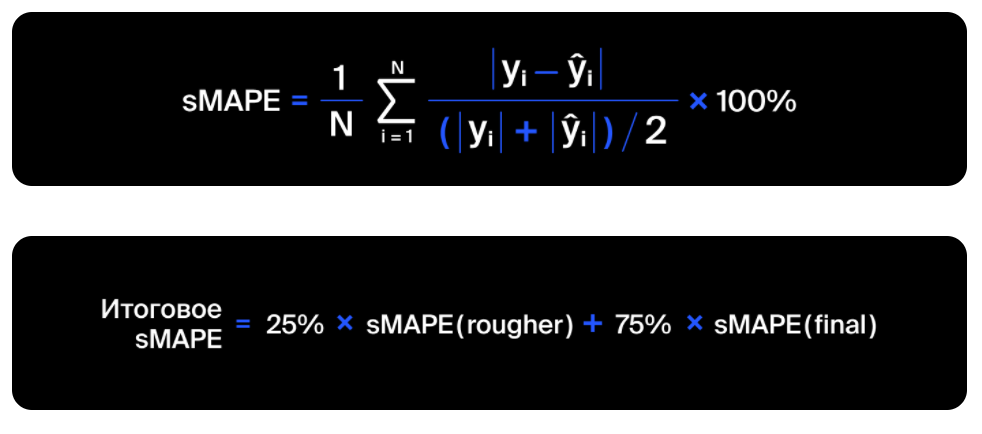

In [75]:
def smape_calc(true, predicted):
    return 2.0 * np.mean(np.abs(true - predicted) / (np.abs(true) + np.abs(predicted))) * 100

In [76]:
def smape_global(smape_rougher, smape_final):
    return 0.25*smape_rougher + 0.75*smape_final

### Обучение и проверка моделей

В качестве моделей обучения условимся рассмотреть случайный лес и линейную регрессию. Для случайного леса подберём оптимальные параметры при помощи Gridsearchcv. Оценку при помощи smape сделаем возможной при помощи make_scorer

In [77]:
# для наглядности изменений новые библиотеки импортирую тут, а не в начале файла
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [78]:
# создаём новую метрику качества на основе функции smape
score = make_scorer(smape_calc, greater_is_better=False)

In [79]:
# зададим диапазоны поиска оптимальных параметров 
max_depth = range(1, 16)                   
max_trees = range(1, 16)

forest_params = {'max_depth': max_depth, 'n_estimators': max_trees}

Пробовал поднять диапазон поиска оптимальных значений до 25-30, но модель не обучилась за 3 часа). Поэтому пришлось убавить хотя бы до 15

In [80]:
model_rougher = RandomForestRegressor(random_state=12345)
model_final = RandomForestRegressor(random_state=12345)

In [81]:
forest_grid_rougher = GridSearchCV(model_rougher, forest_params, cv=5, scoring=score)
forest_grid_final = GridSearchCV(model_final, forest_params, cv=5, scoring=score) 

Теперь из ранее обработанного data_train выполним разделение на валидационную и обучающую выборки для моделей предсказания эффективности получения чернового и финального концентратов

In [82]:
features_train_rougher, features_valid_rougher, target_train_rougher, target_valid_rougher = train_test_split(features_rougher,
                                                                                                             target_rougher,
                                                                                                             test_size=0.25,
                                                                                                             random_state=12345)
features_train_final, features_valid_final, target_train_final, target_valid_final = train_test_split(features_final,
                                                                                                             target_final,
                                                                                                             test_size=0.25,
                                                                                                             random_state=12345)

In [83]:
forest_grid_rougher.fit(features_train_rougher, target_train_rougher)
forest_grid_final.fit(features_train_final, target_train_final)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 16),
                         'n_estimators': range(1, 16)},
             scoring=make_scorer(smape_calc, greater_is_better=False))

In [84]:
print('Лучшие параметры модели случайного леса для чернового концентрата:', '\n' ,forest_grid_rougher.best_params_, '\n', 
      f'Наименьшая величина sMAPE: {forest_grid_rougher.best_score_}')
print()
print('Лучшие параметры модели случайного леса для чернового концентрата:', '\n' ,forest_grid_final.best_params_, '\n', 
      f'Наименьшая величина sMAPE: {forest_grid_final.best_score_}')

Лучшие параметры модели случайного леса для чернового концентрата: 
 {'max_depth': 15, 'n_estimators': 15} 
 Наименьшая величина sMAPE: -3.159963148643551

Лучшие параметры модели случайного леса для чернового концентрата: 
 {'max_depth': 15, 'n_estimators': 15} 
 Наименьшая величина sMAPE: -6.328635482810647


Теперь нам известны лучшие параметры для случайного леса и минимальная величина sMAPE, которую мы можем при помощи него получить

Выполним проверку на валидационных выборках 

In [85]:
print(f'Значение sMAPE на валидационной выборке для модели чернового концентрата: {smape_calc(target_valid_rougher, forest_grid_rougher.predict(features_valid_rougher))}')
print(f'Значение sMAPE на валидационной выборке для модели финального концентрата: {smape_calc(target_valid_final, forest_grid_final.predict(features_valid_final))}')
print(f'Итоговое значение sMAPE по валидационной выборке: {smape_global(smape_calc(target_valid_rougher, forest_grid_rougher.predict(features_valid_rougher)),smape_calc(target_valid_final, forest_grid_final.predict(features_valid_final)))}')

Значение sMAPE на валидационной выборке для модели чернового концентрата: 2.9604829035903557
Значение sMAPE на валидационной выборке для модели финального концентрата: 6.225133840498126
Итоговое значение sMAPE по валидационной выборке: 5.408971106271184


Так же стоит посмотреть насколько точны могут быть предсказания при помощи линейной регрессии:

In [86]:
linear_regressor_model_rougher = LinearRegression()
linear_regressor_model_final = LinearRegression()
linear_regressor_model_rougher.fit(features_train_rougher, target_train_rougher)
linear_regressor_model_final.fit(features_train_final, target_train_final)
linear_regressor_predictions_rougher = linear_regressor_model_rougher.predict(features_valid_rougher)
linear_regressor_predictions_final = linear_regressor_model_final.predict(features_valid_final)
smape_linear_regressor_rougher = smape_calc(target_valid_rougher, linear_regressor_predictions_rougher)
smape_linear_regressor_final = smape_calc(target_valid_final, linear_regressor_predictions_final)

In [87]:
print(f'При использовании линейной регрессии значение sMAPE для модели чернового концентрата: {smape_linear_regressor_rougher}')
print(f'При использовании линейной регрессии значение sMAPE для модели финального концентрата: {smape_linear_regressor_final}')
print(f'Значение итогового sMAPE при применении модели линейной регрессии: {smape_global(smape_linear_regressor_rougher,smape_linear_regressor_final)}')

При использовании линейной регрессии значение sMAPE для модели чернового концентрата: 5.110038965895276
При использовании линейной регрессии значение sMAPE для модели финального концентрата: 8.028741726914728
Значение итогового sMAPE при применении модели линейной регрессии: 7.299066036659864


Очевидно, модели случайного леса сделали более точные прогнозы - их в дальнейшем и будем использовать на тестовой выборке

При помощи кросс-валидации сделаем проверку того, насколько успешными выдались предсказания

In [88]:
cross_val_results_rougher = cross_val_score(model_rougher, features_rougher, target_rougher, cv=5, scoring=score)
cross_val_results_final = cross_val_score(model_final, features_final, target_final, cv=5, scoring=score)
mean_cross_val_results_rougher = sum(cross_val_results_rougher)/5
mean_cross_val_results_final = sum(cross_val_results_final)/5

print(f'Оценочное значение sMAPE для чернового концентрата кросс-валидацией для выбранной модели решающего дерева: {mean_cross_val_results_rougher}')
print(f'Оценочное значение sMAPE для финального концентрата кросс-валидацией для выбранной модели решающего дерева: {mean_cross_val_results_final}')

Оценочное значение sMAPE для чернового концентрата кросс-валидацией для выбранной модели решающего дерева: -6.8351554751836385
Оценочное значение sMAPE для финального концентрата кросс-валидацией для выбранной модели решающего дерева: -9.780088145795458


In [89]:
print(f'Общее значение sMAPE по оценке кросс-валидацией: {smape_global(mean_cross_val_results_rougher,mean_cross_val_results_final)}')

Общее значение sMAPE по оценке кросс-валидацией: -9.043854978142503


Можем сказать, что принятые за лучше предсказания случайного леса - весьма хороши и как минимум оценка кросс-валидацией показала даже более слабый средний результат. Обученную модель случайного леса однозначно можно проверить уже и на тестовой выборке

В тестовой выборке нет целевых признаков для проверки работоспособности модели - достанем их из общего датафрейма

In [90]:
data_test_merged = pd.merge(data_full, data_test, how='inner')

Выберем целевые и обучающие признаки из тестового датафрейма:

In [91]:
features_rougher_test = data_test_merged[rougher_recovery_inf]
target_rougher_test = data_test_merged['rougher.output.recovery']
features_final_test = data_test_merged[data_test.columns]
target_final_test = data_test_merged['final.output.recovery']

Сделаем предсказания

In [92]:
predictions_rougher_forest = forest_grid_rougher.predict(features_rougher_test)
predictions_final_forest = forest_grid_final.predict(features_final_test)

Значения sMAPE для каждой из моделей:

In [93]:
print(f'Значение sMAPE для модели чернового концентрата: {smape_calc(target_rougher_test, predictions_rougher_forest)}')
print(f'Значение sMAPE для модели финального концентрата: {smape_calc(target_final_test, predictions_final_forest)}')

Значение sMAPE для модели чернового концентрата: 4.5084565814373025
Значение sMAPE для модели финального концентрата: 8.49552726710888


Значение итогового sMAPE:

In [94]:
rough_smape = smape_calc(target_rougher_test, predictions_rougher_forest)
final_smape = smape_calc(target_final_test, predictions_final_forest)
print(f'Значение итогового sMAPE: {smape_global(rough_smape,final_smape)}')

Значение итогового sMAPE: 7.498759595690986


Что ж, более-менее ожидаемое и неплохое значение. Можно сказать что обученные модели себя оправдали

## Общий вывод:

Выполнена предобработка исходных данных для заполнения отсутствующих значений, проверена их правильность - в частности перепроверена заданная эффективность обогащения **rougher.output.recovery**

Показано, как меняется от этапа к этапу концентрация основных металлов в составе смеси. Наглядно показано, что опять же, данные адекватны - по мере продвижения по ступеням очистки концентрация золота с каждым этапом от исходного сырья до финальной смеси стабильно растёт.

Выписаны функции для вычисления требуемой по условию метрики качества данного задания sMAPE. При помощи ручной кросс-валидации и перебора гиперпараметров разных моделей выбрана лучшая. При обучении моделей для вычисления эффективности получения чернового и финального концентратов предусмотрена ошибка "заглядывания в будущее" моделью и на обучение моделям даны разные обучающие признаки. 